<img src="../Img/banner-fa-49-2.jpg">
12 апреля 2021 года, ВМ/305-1(кк)

# Тема 5. Анализ временных рядов

## Анализ цены акции Mail.ru

Студенты: Поток У18-7у<br>
Преподаватель: Смирнов Михаил Викторович, доцент Департамента Анализа данных и машинного обучения Финансового университета при Правительстве Российской Федерации

# 1. Обработка исходных данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [2]:
data = pd.read_csv("./Data/MAIL_201214_210412.csv", sep=";")
data

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,MAIL,D,20201214,0,2085.2
1,MAIL,D,20201215,0,2086.0
2,MAIL,D,20201216,0,2063.8
3,MAIL,D,20201217,0,2049.6
4,MAIL,D,20201218,0,2007.4
...,...,...,...,...,...
77,MAIL,D,20210406,0,1759.4
78,MAIL,D,20210407,0,1748.0
79,MAIL,D,20210408,0,1743.6
80,MAIL,D,20210409,0,1717.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  82 non-null     object 
 1   <PER>     82 non-null     object 
 2   <DATE>    82 non-null     int64  
 3   <TIME>    82 non-null     int64  
 4   <CLOSE>   82 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.3+ KB


In [4]:
data["<DATE>"]=data["<DATE>"].apply(lambda x : dt.strptime(str(x),"%Y%m%d"))
data

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,MAIL,D,2020-12-14,0,2085.2
1,MAIL,D,2020-12-15,0,2086.0
2,MAIL,D,2020-12-16,0,2063.8
3,MAIL,D,2020-12-17,0,2049.6
4,MAIL,D,2020-12-18,0,2007.4
...,...,...,...,...,...
77,MAIL,D,2021-04-06,0,1759.4
78,MAIL,D,2021-04-07,0,1748.0
79,MAIL,D,2021-04-08,0,1743.6
80,MAIL,D,2021-04-09,0,1717.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   <TICKER>  82 non-null     object        
 1   <PER>     82 non-null     object        
 2   <DATE>    82 non-null     datetime64[ns]
 3   <TIME>    82 non-null     int64         
 4   <CLOSE>   82 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.3+ KB


# 2. Линия тренда

## 2.1. Линейная модель

Построим модель вида
$$
\widehat{y}=a+b\cdot{x}
$$

In [6]:
y = data["<CLOSE>"]
x = np.arange(1, len(data)+1)
n = len(data)

cov_xy = np.cov(x, y)[0,1]
disp_x = np.std(x)**2
b = cov_xy / disp_x
a = np.mean(y) - b * np.mean(x)
y_model = a + b * x
print(f'a={round(a,2)}, b={round(b,2)}')

a=2091.52, b=-3.78


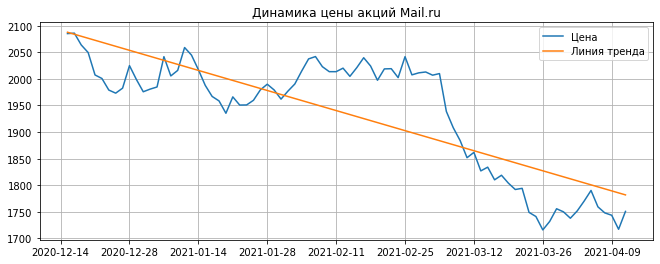

In [7]:
plt.figure(figsize=(11,4))
plt.title("Динамика цены акций Mail.ru")
plt.plot(x, y, label = "Цена")
plt.plot(x, y_model, label = "Линия тренда")
plt.xticks(ticks=np.arange(0,n,10), 
           labels=data["<DATE>"].apply(lambda x: dt.strftime(x,"%Y-%m-%d"))[::10])
plt.grid()
plt.legend();

Рассчитаем $ R^2 $ по формуле
$$
R^2=\frac{D_y - D_{\epsilon}}{D_y}
$$

где $D_y$ - дисперсия цены акции, $D_{\epsilon}$ - дисперсия остатков модели.

In [8]:
disp_y = np.sum((y - np.mean(y))**2/n)
disp_epsilon = np.sum((y - y_model)**2/n)

print("Дисперсия цены", round(disp_y,3))
print("Дисперсия остатков модели", round(disp_epsilon,3))

R2 = (disp_y - disp_epsilon) / disp_y
print("R^2 =", round(R2,3))

Дисперсия цены 12070.191
Дисперсия остатков модели 4275.773
R^2 = 0.646


## 2.2. Нелинейная модель

Построим модель вида
$$
\widehat{y}=a+b\cdot{x}+c\cdot{x^2}
$$

Найдем вектор параметров $w = (a, b, c)$, применив метод наименьших квадратов. 

$$
\widehat{y} = \sum_{i=0}^I w_i x_{i} = X{w}^T
$$

Решив уравнение в матричном виде, получим соотношение

$$ w=({X}^{T} {X})^{-1} {X}^{T}{y} $$

где $X$ - матрица признаков, $y$ - вектор значений цены акции.

Вектор $y$ известен и содержится в исходных данных. Сформируем матрицу $X$.

In [9]:
x0=np.ones(len(data))
x1=x
x2 = x**2
X=np.stack((x0,x1,x2),axis=1)
print(X[:5])

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]


In [10]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(w)

[ 1.98877724e+03  3.47169367e+00 -8.67699991e-02]


In [11]:
y_model = w[0]*X[:,0] + w[1]*X[:,1] + w[2]*X[:,2]

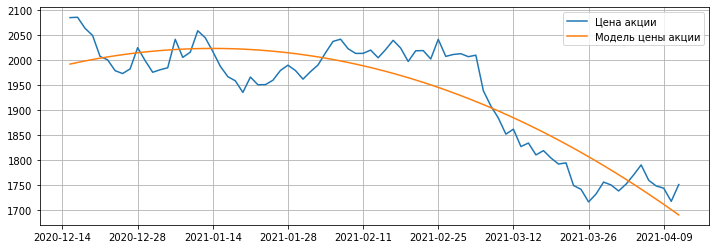

In [12]:
plt.figure(figsize=(12,4))
plt.plot(x, y, label="Цена акции")
plt.plot(x, y_model, label="Модель цены акции")
plt.grid()
plt.xticks(ticks=np.arange(0,n,10), 
           labels=data["<DATE>"].apply(lambda x: dt.strftime(x,"%Y-%m-%d"))[::10])
plt.legend();

Рассчитаем $R^2$ нелинейной модели

In [13]:
disp_epsilon = np.sum((y - y_model)**2/n)
print("Дисперсия цены", round(disp_y,3))
print("Дисперсия цены относительно модели", round(disp_epsilon,3))

R2 = (disp_y - disp_epsilon) / disp_y
print("R^2 =", round(R2,3))

Дисперсия цены 12070.191
Дисперсия цены относительно модели 2384.858
R^2 = 0.802


<u>Вывод</u>.

$R^2$ нелинейной модели значительно ближе к единице. Исходя из значений $R^2$ для линейной и нелинейной моделей, можно сделать вывод о том, что нелинейная модель лучше интерполирует имеющиеся данные о динамике цены акций.